In [1]:
import mylib.ICA as ica
import mylib.IO as io
import matplotlib.pyplot as plt
import scipy.io.wavfile as spwav
import numpy as np
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# load the data from files
sound1 = spwav.read('report2_all/report2_kadai2_data2/speechB1.wav')[1]
sound2 = spwav.read('report2_all/report2_kadai2_data2/speechB2.wav')[1]
sound3 = spwav.read('report2_all/report2_kadai2_data2/speechB3.wav')[1]
dataX = np.array((sound1,sound2,sound3))

#linear conversion of every dataX[i] so that E[dataX[i]] = 0
dataX, meanarr = ica.make_mean_0(dataX)
print(len(dataX[0]),len(dataX[1]),len(dataX[2]))

112013 112013 112013


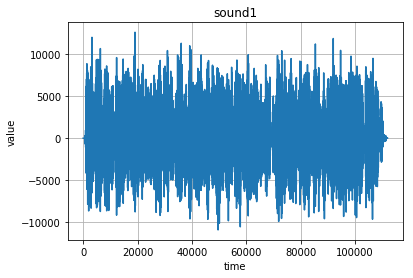

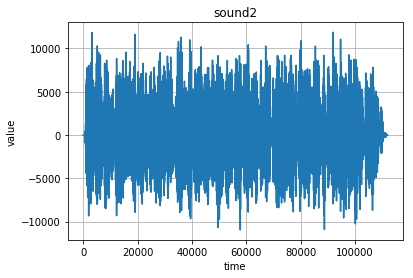

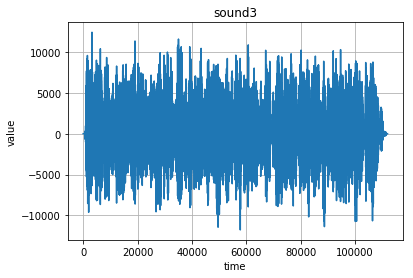

In [3]:
# show sound1
io.plot_graph(dataX[0], 'sound1', 'time')
plt.show()

# show sound2
io.plot_graph(dataX[1], 'sound2', 'time')
plt.show()

# show sound3
io.plot_graph(dataX[2], 'sound3', 'time')
plt.show()

In [4]:
# whiten dataX
dataZ = ica.whitening_data(dataX)

# calculate a matrix W
mat_W = ica.make_W(dataZ, 3)

In [5]:
# calculate three source signals
source = ica.find_source(mat_W, dataZ)

# standardize each source
source = io.standardize_wav(source)

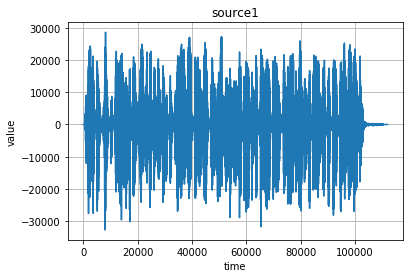

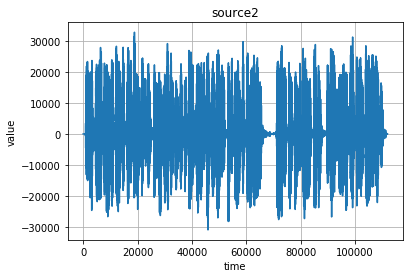

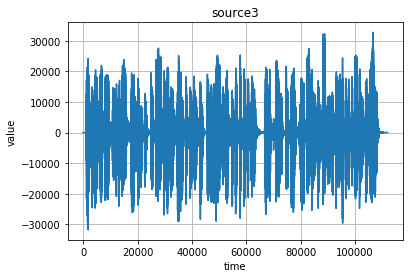

In [6]:
# show source1
io.plot_graph(source[0], 'source1', 'time')
plt.show()

# show source2
io.plot_graph(source[1], 'source2', 'time')
plt.show()

# show source3
io.plot_graph(source[2], 'source3', 'time')
plt.show()

In [7]:
# write each source to a wavfile
spwav.write('separated_source/kadai2/kadai2_2/speech1.wav', 8000, source[0])
spwav.write('separated_source/kadai2/kadai2_2/speech2.wav', 8000, source[1])
spwav.write('separated_source/kadai2/kadai2_2/speech3.wav', 8000, source[2])